<a href="https://colab.research.google.com/github/whlapinel/5154-project/blob/main/5154_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

## Dataset

- The dataset used is the well-known "Bank Marketing" dataset published [here](https://archive.ics.uci.edu/dataset/222/bank+marketing) in the UCI Machine Learning Repository.

## Papers

- My primary paper is Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.
- Other papers reviewed:
  - Bera, S.K., Chakrabarty, D., & Negahbani, M. (2019). Fair Algorithms for Clustering. ArXiv, abs/1901.02393.
  - Ziko, I.M., Granger, E., Yuan, J., & Ayed, I.B. (2019). Clustering with Fairness Constraints: A Flexible and Scalable Approach. ArXiv, abs/1906.08207.

## Procedure and Results Summary

- I used the four models used in the original paper:
  - Neural Network (Multilayer Perceptron)
  - Support Vector Machines
  - Decision Trees
  - Logistic Regression


- My procedures were substantially different falling under two reasons:

  - The original research I was trying to reproduce used R instead of Python. I'm not sure what impact if any this might have had on my results.
  - I didn't understand how to do some of the things they mentioned in the paper. (Give example)

- Still, my results were consistent with those described in the paper. The neural network scored the highest of the four with a AUC of .77 (in the paper the AUC was .80)

# Part 1: Preprocessing and Cleaning

## Step 1: Download and Explore Data

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X_imported = bank_marketing.data.features
y_imported = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)



{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
X_imported.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day_of_week,int64


In [4]:
X_imported.shape

(45211, 16)

In [5]:
X_imported.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [6]:
X_imported.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [7]:
stats = X_imported.describe()
stats

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
X_numeric = X_imported.select_dtypes(include=['int64', 'float64'])
skewnesses = X_numeric.skew()
skewnesses


,0
age,0.684818
balance,8.360308
day_of_week,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


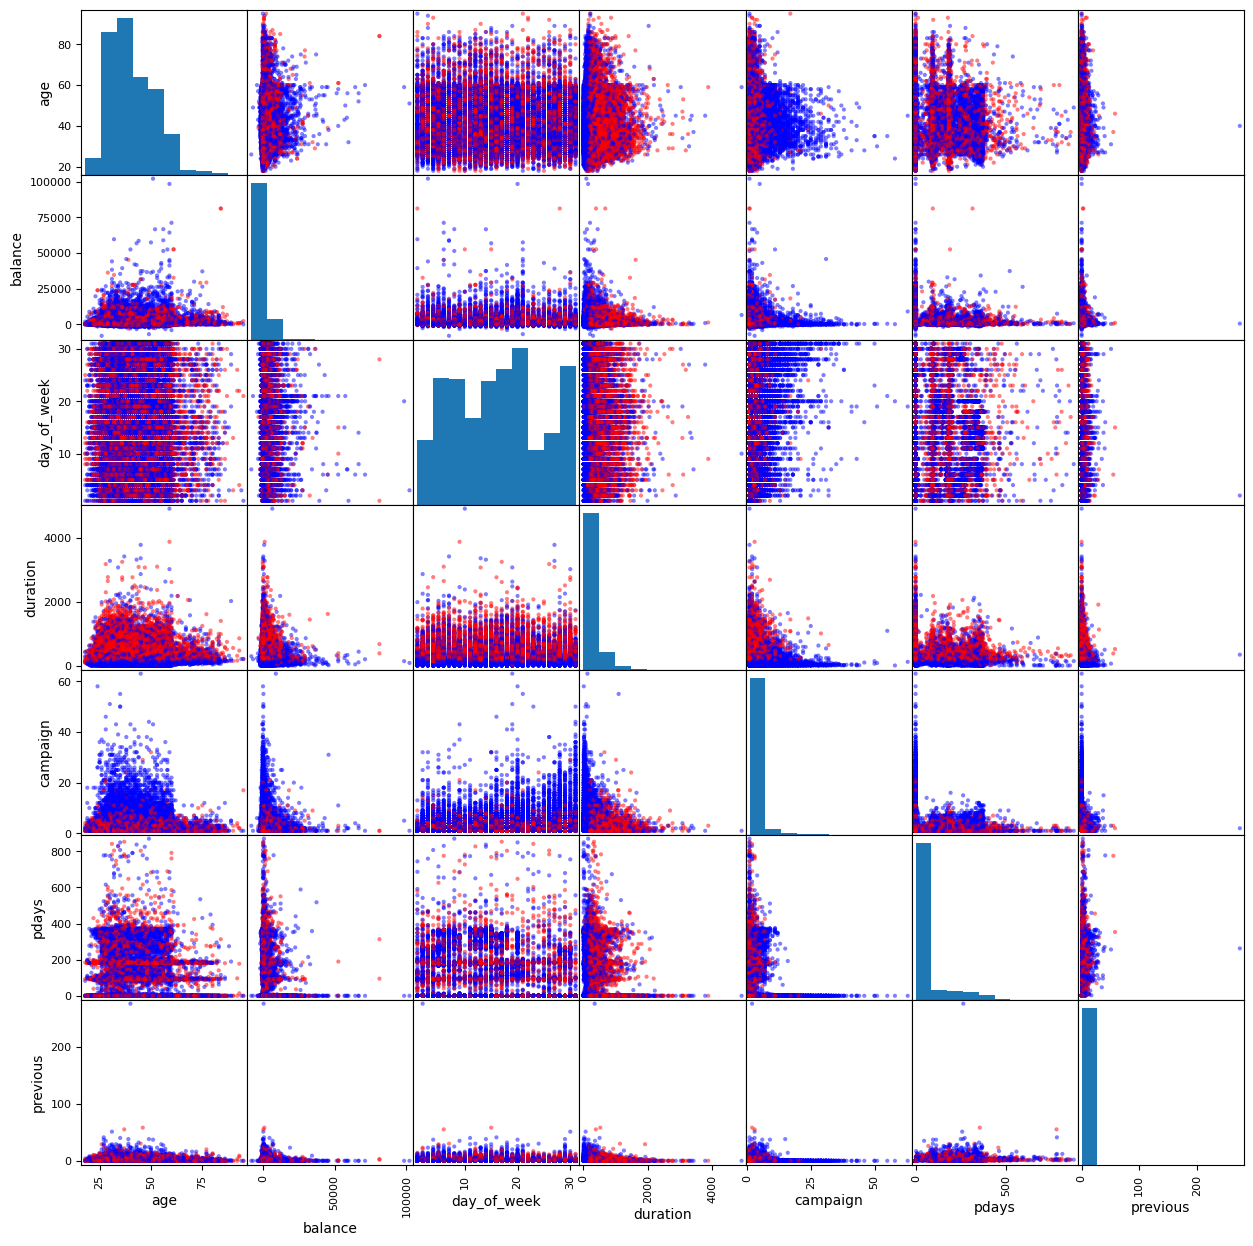

In [9]:
pd.plotting.scatter_matrix(X_numeric, figsize=(15, 15), c=y_imported['y'].map({'yes': 'red', 'no': 'blue'}))
plt.show()

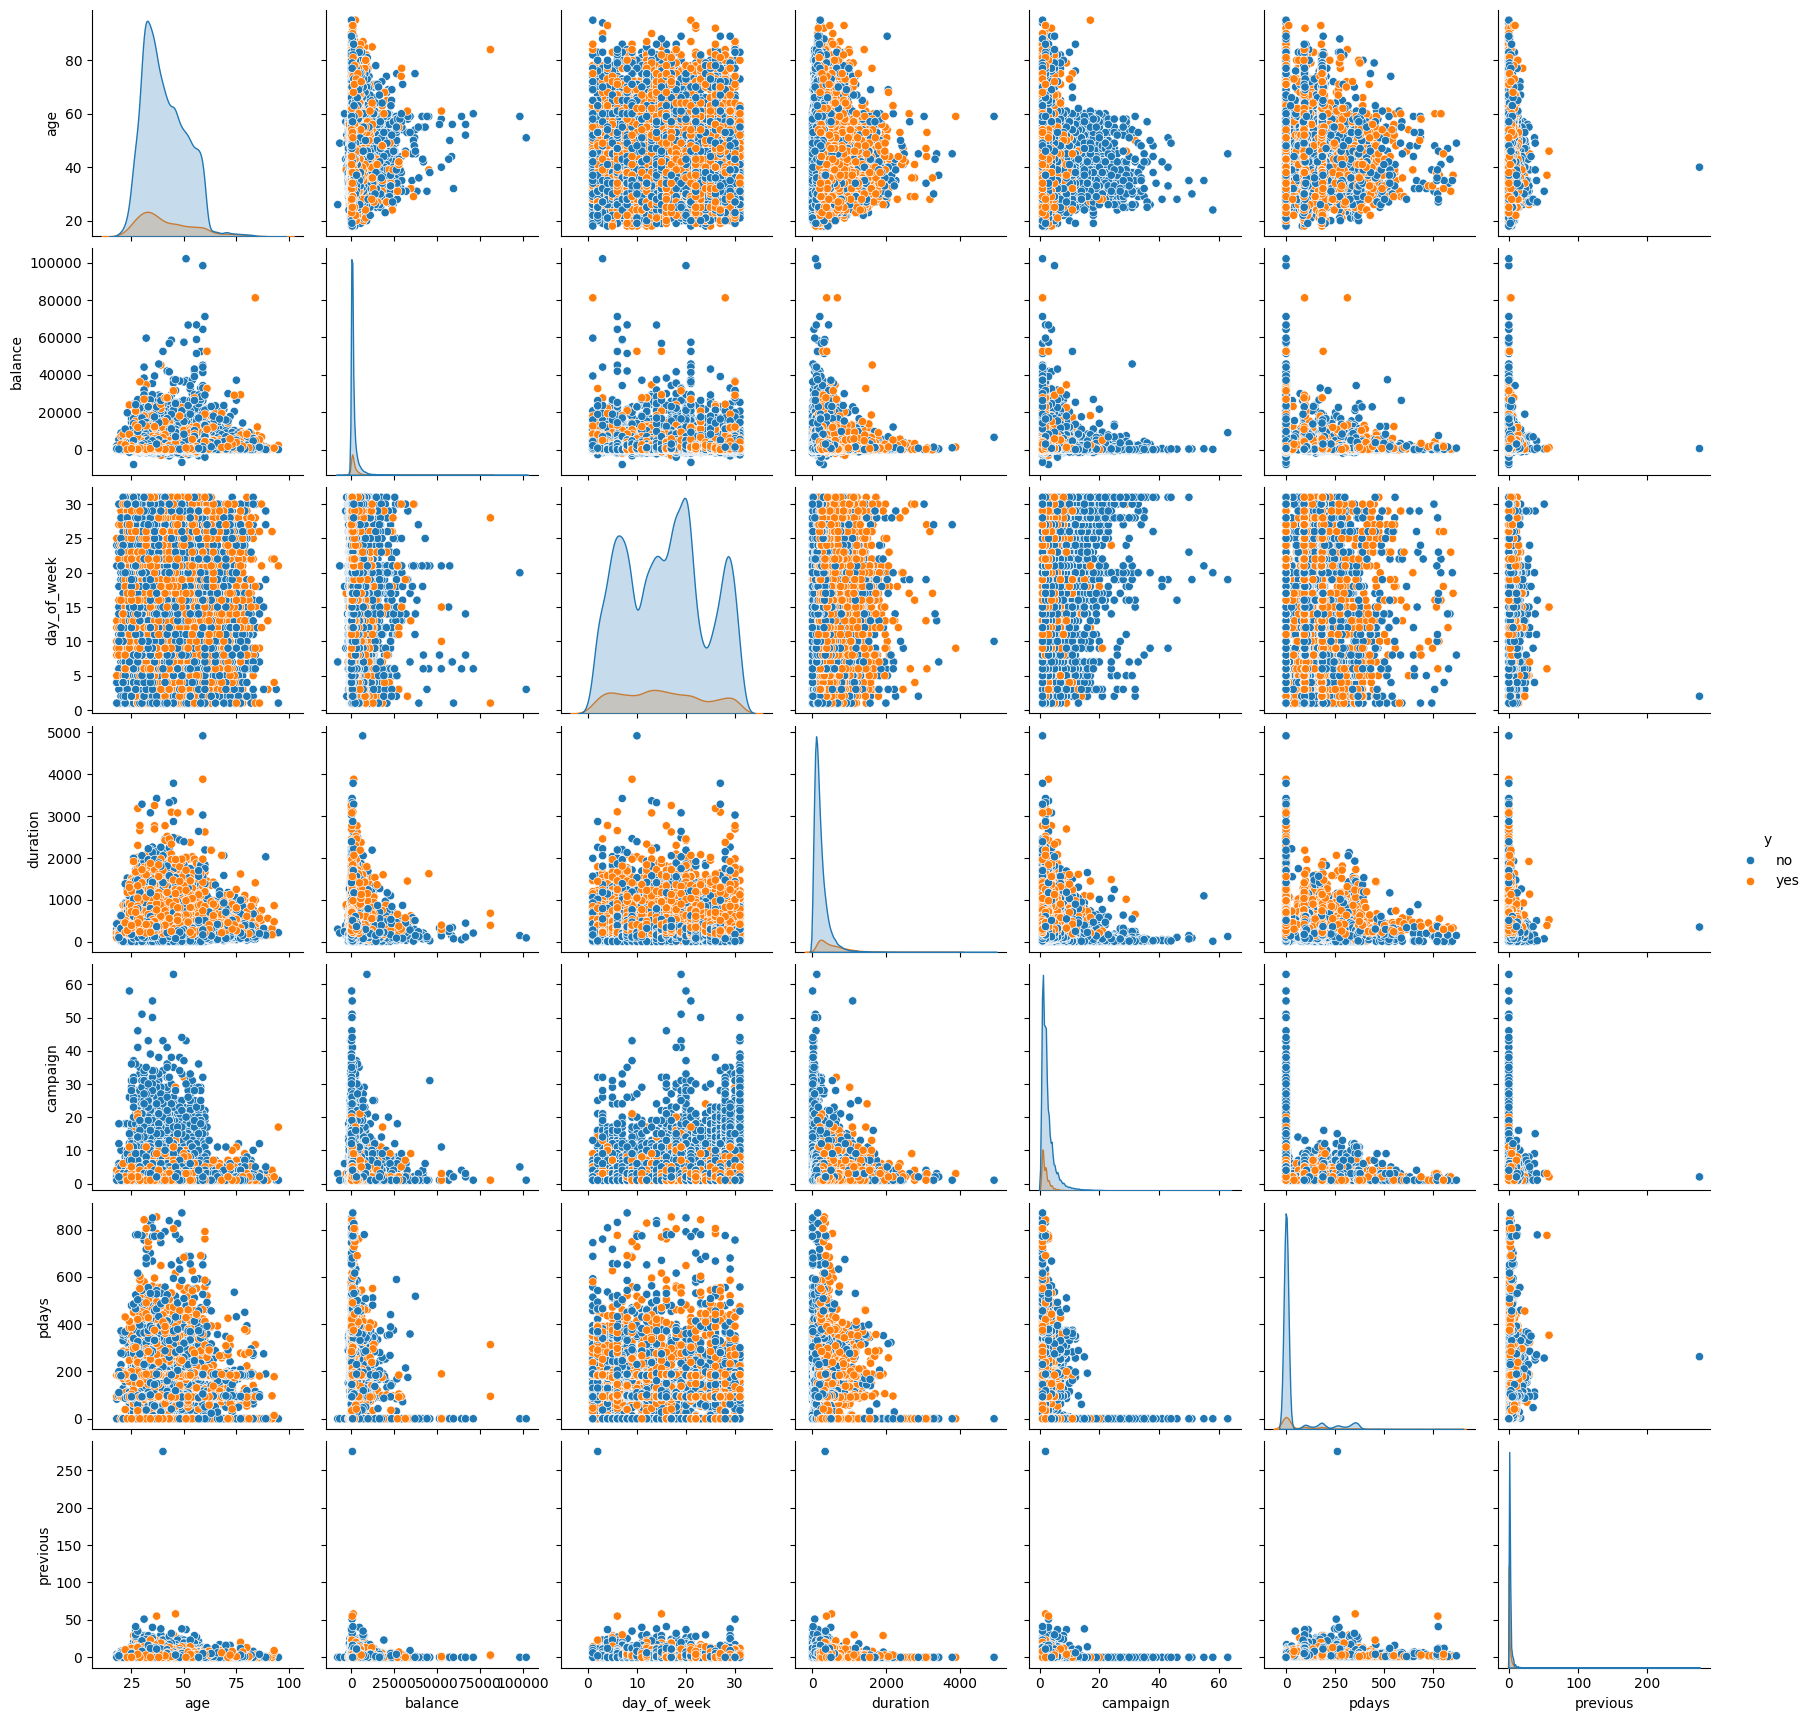

In [10]:
df_combined = pd.concat([X_numeric, y_imported], axis=1)
df_combined.head()
import seaborn as sns
sns.pairplot(df_combined, hue='y')
plt.show()

In [11]:
X_imported.head()
print(X_imported['day_of_week'].unique())

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


## Interesting findings from Exploratory Data Analysis:
- Some of the feature data is highly skewed; for example "previous" has a skewness value of over 41.
- The column named "day of week" actually appears to contain the day of the month.
- poutcome is missing values in most rows

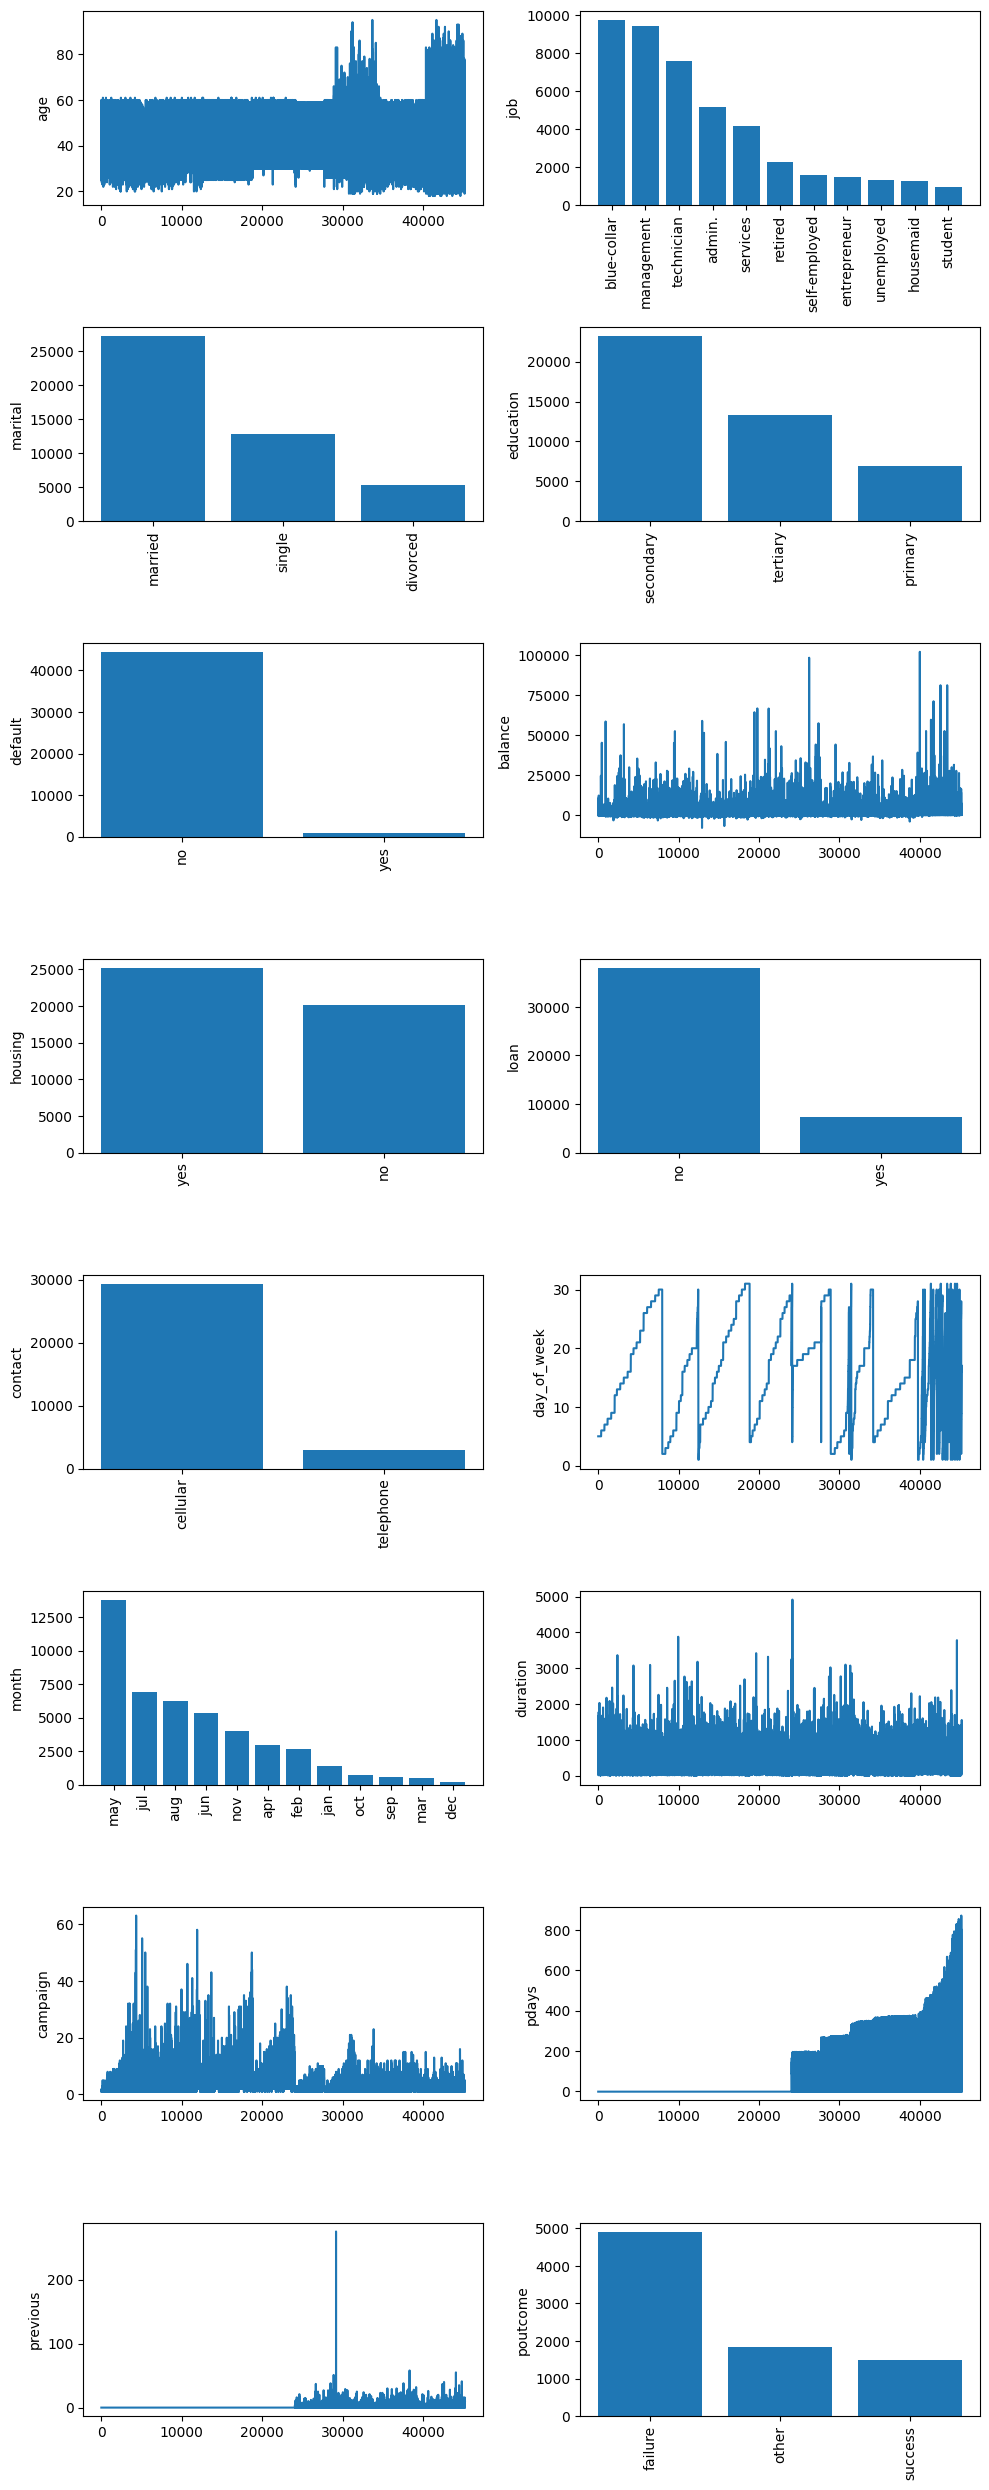

In [12]:
fig = plt.figure(figsize=(10,25))
plt.clf() # Clear previous plt figure
for i in range(16):
    plt.subplot(8, 2, i+1) # Selects which subplot to plot to
    column_type = X_imported.dtypes.iloc[i]
    if column_type == 'object':
      value_counts = X_imported.iloc[:, i].value_counts()
      plt.bar(value_counts.index, value_counts.values)
      plt.xticks(rotation=90)
    else:
      plt.plot(X_imported.iloc[:, i]) # Plots a given column
    plt.ylabel(X_imported.columns.values[i]) # Sets Y label
fig.tight_layout()

## Step 2: Feature Selection
- 'duration' is known only after the call, so it's not suitable for predictive modeling.

In [13]:
X = X_imported.drop(columns=['duration','poutcome'], axis=1)
X.rename(columns={'day_of_week': 'day_of_month'}, inplace=True)
y = y_imported
X.shape

(45211, 14)

## Step 3: Handle Categorical Variables
- Convert categorical columns to numeric with Label Encoding for binary columns or One-Hot Encoding for multi-category columns.


In [21]:
categorical_cols = X.select_dtypes(include=['object']).columns

categorical_cols

Index(['default', 'housing', 'loan'], dtype='object')

### Apply Label Encoding for binary columns (e.g., yes/no columns)


In [22]:
label_encodable = ['default', 'housing', 'loan']
label_encoder = LabelEncoder()
for col in label_encodable:
    X.loc[:, col] = label_encoder.fit_transform(X[col])

y.loc[:, 'y'] = label_encoder.fit_transform(y['y'])

print(X.head())
y.head()

   age default  balance housing loan  day_of_month  campaign  pdays  previous  \
0   58       0     2143       1    0             5         1     -1         0   
1   44       0       29       1    0             5         1     -1         0   
2   33       0        2       1    1             5         1     -1         0   
3   47       0     1506       1    0             5         1     -1         0   
4   33       0        1       0    0             5         1     -1         0   

   job_blue-collar  ...  month_dec  month_feb  month_jan  month_jul  \
0            False  ...      False      False      False      False   
1            False  ...      False      False      False      False   
2            False  ...      False      False      False      False   
3             True  ...      False      False      False      False   
4            False  ...      False      False      False      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      False    

,y
0,0
1,0
2,0
3,0
4,0


### Apply One-Hot Encoding for other categorical columns


In [23]:
X = pd.get_dummies(X, columns=[col for col in categorical_cols if col not in label_encodable], drop_first=True)

print(X.shape)

X.head()

(45211, 35)


,age,default,balance,housing,loan,day_of_month,campaign,pdays,previous,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,1,-1,0,False,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,1,-1,0,False,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,1,-1,0,False,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,1,-1,0,True,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,1,-1,0,False,...,False,False,False,False,False,False,True,False,False,False


## Step 4: Train-Test Split
- Split the data by time for a temporal split to mimic training on past data and testing on future data.
- Here, using a standard split since exact temporal order isn't specified in the dataset.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_test = y_test.astype(int)
y_train = y_train.astype(int)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (36168, 35)
X_test shape: (9043, 35)
y_train shape: (36168, 1)
y_test shape: (9043, 1)


## Step 5: Standardize Numeric Features
- Scaling numeric features to standardize the input for models that require normalized data

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessed data is ready for modeling
print("Data preprocessing completed.")

print("X_train: ", X_train[:5, ].shape)
print("X_test: ", X_test[:5, ].shape)

Data preprocessing completed.
X_train:  (5, 35)
X_test:  (5, 35)


# Part 2: Modeling Phase

### Step 1: Import libraries

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


### Step 2: Initialize the models


In [27]:
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)


### Step 3: Train the models


In [28]:

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Neural Network': nn, 'SVM': svm}
for name, model in models.items():
    model.fit(X_train, y_train['y'])
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Neural Network trained.
SVM trained.


# Part 3: Evaluation Phase

- Following along with the paper, the two metrics used in this project are AUC and LIFT.
- AUC stands for Area Under the Curve.
- Usually and in this case, "Curve" refers to Receiver Operating Characteristic Curve.
- The ROC Curve is a plot of the True Positive Rate against the False Positive Rate.
- **True Positive Rate**: of all the positive samples, how many did the model correctly predict as positive?
- **False Positive Rate**: of all the negative samples, how many did the model mistakenly predict as positive?

Breakdown:
- AUC = 1.0: Perfect model. It can perfectly distinguish between classes.
- AUC = 0.5: No discrimination (equivalent to random guessing).
- AUC < 0.5: Worse than random guessing, indicating the model may be making systematic errors.

### Basic Metrics

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    return accuracy, precision, recall, f1

for name, model in models.items():
    accuracy, precision, recall, f1 = metrics(model, X_test, y_test)
    print()
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1-Score: {f1:.2%}")



Logistic Regression Metrics:
Accuracy: 88.44%
Precision: 53.99%
Recall: 8.32%
F1-Score: 14.41%

Decision Tree Metrics:
Accuracy: 82.52%
Precision: 27.74%
Recall: 30.81%
F1-Score: 29.20%

Neural Network Metrics:
Accuracy: 88.78%
Precision: 55.96%
Recall: 19.09%
F1-Score: 28.47%

SVM Metrics:
Accuracy: 88.43%
Precision: 56.98%
Recall: 4.63%
F1-Score: 8.57%


### Step 1: Calculate AUC and plot ROC for each model


Logistic Regression AUC: 0.74
Decision Tree AUC: 0.60
Neural Network AUC: 0.77
SVM AUC: 0.62


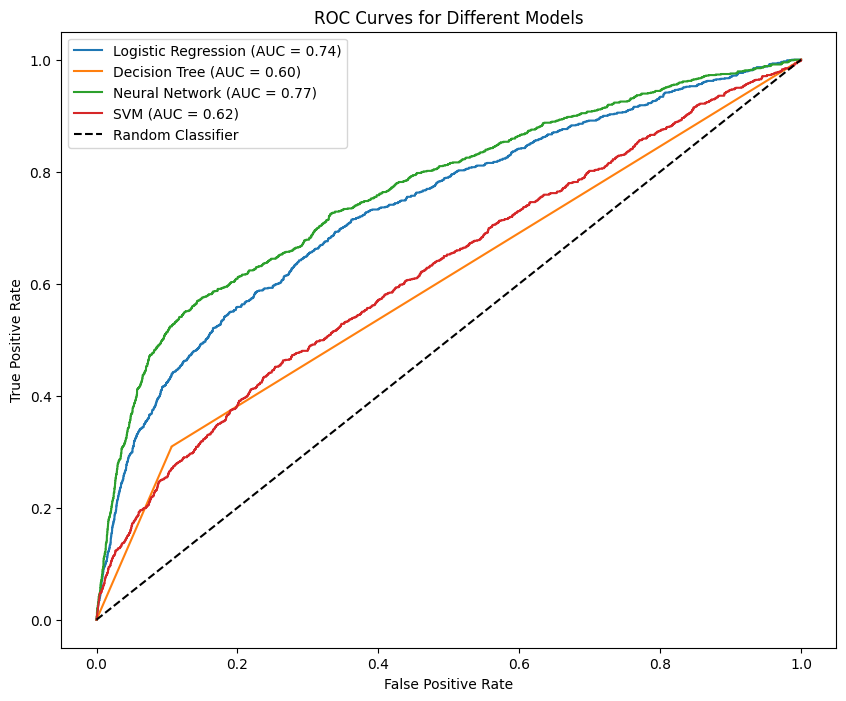

In [29]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, predictions[:, 1])
    return auc_score, predictions[:, 1]

plt.figure(figsize=(10, 8))
for name, model in models.items():
    auc_score, y_pred_proba = evaluate_model(model, X_test, y_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    print(f"{name} AUC: {auc_score:.2f}")

# Plotting ROC Curves
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

### Step 2: Calculate and plot Lift chart

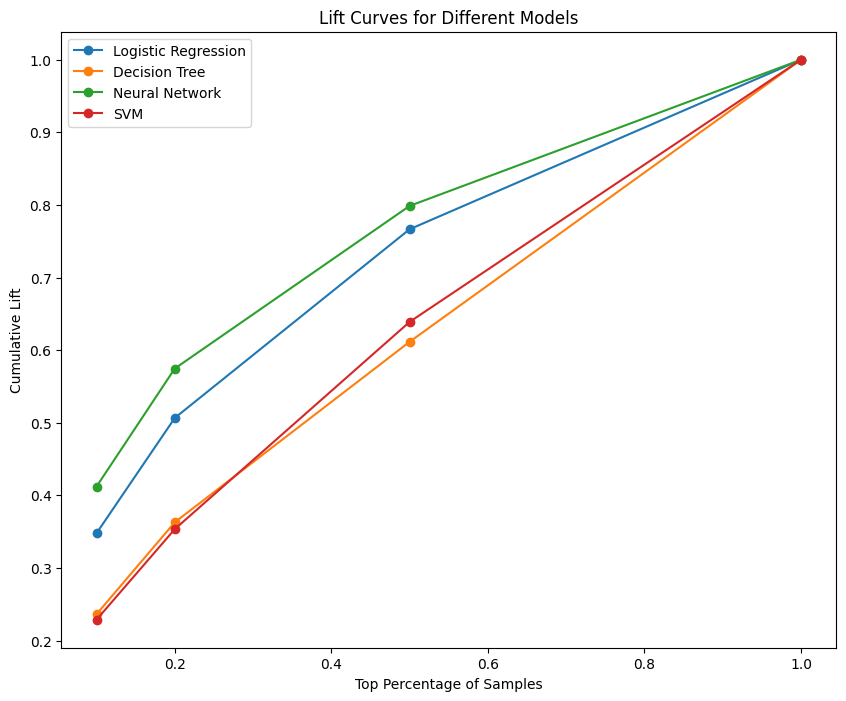

In [30]:
# Function to calculate and plot lift curve
def calculate_lift(y_true, y_pred_proba, percentiles=[0.1, 0.2, 0.5, 1.0]):
    sorted_indices = np.argsort(-y_pred_proba)
    y_true_sorted = y_true[sorted_indices]
    lift_values = []

    for p in percentiles:
        top_n = int(len(y_true_sorted) * p)
        lift = np.sum(y_true_sorted[:top_n]) / np.sum(y_true_sorted)
        lift_values.append(lift)

    return percentiles, lift_values

# Plot Lift Curves for All Models
plt.figure(figsize=(10, 8))
percentiles = [0.1, 0.2, 0.5, 1.0]

for name, model in models.items():
    _, y_pred_proba = evaluate_model(model, X_test, y_test)
    p, lift_values = calculate_lift(y_test.values, y_pred_proba, percentiles)
    plt.plot(p, lift_values, marker='o', label=name)

# Plot Settings
plt.title("Lift Curves for Different Models")
plt.xlabel("Top Percentage of Samples")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.show()

# Conclusions and Next Steps
- Find out which features are most important for each model and the relationship between those features and the target
- Deepen my understanding of the strengths and weaknesses of each of these models and how they work (currently still very superficial)